In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare,chi2_contingency


In [4]:
ins_df=pd.read_csv('insurance.csv')

In [5]:
ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
ins_df.shape

(1338, 7)

according to me 1338 rows are to cover all permutation and combination from that we can say that this data is enough to do modelling or to any decision

In [7]:
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

data having both categorical and numerical variable 

In [8]:
ins_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no nan value in the data,means no data is missing 

In [9]:
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


we clealy observe that the charges column have outlier in the right tail side as there difference in 75 quartlie and max value is very large and mean is greater than median which shows right skew

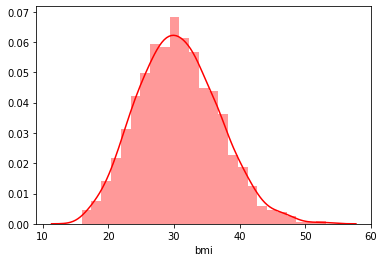

In [10]:
sns.distplot(ins_df['bmi'],color='r')

the bmi data is normally distributed and having a higher tail in the right side of the distribution 

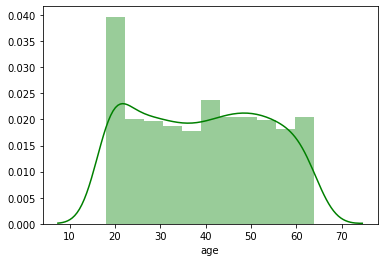

In [11]:
sns.distplot(ins_df['age'],color='g')

its shows the frequency of 20 years age is quite high than other age and most of age values are in between 20 to 60 

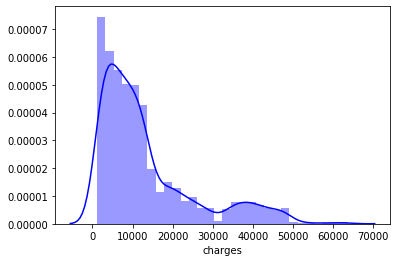

In [12]:
sns.distplot(ins_df['charges'],color='b')

it clearly shows that right tail distribution and most probably oulier present on the side of distribution and as the charges increases frequency of customer decreases

In [13]:
print("skewness of bmi col:",ins_df['bmi'].skew())
print("skewness of age col:",ins_df['age'].skew())
print("skewness of charges col:",ins_df['charges'].skew())

skewness of bmi col: 0.2840471105987448
skewness of age col: 0.05567251565299186
skewness of charges col: 1.5158796580240388


"bmi columns skew is 0.2840 which show small right tail of distribution". "age columns skew is 0.055 which show very very small right skew". "charges column having a skewness of 1.51 which show huge positive right tail of distribution of data".

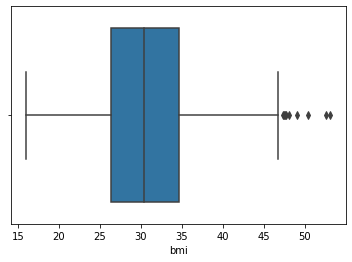

In [14]:
sns.boxplot(ins_df['bmi'])

from the box polt we observe that there are outlier in the right side of distribution 

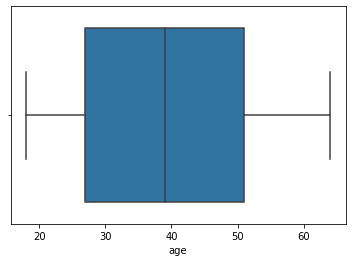

In [15]:
sns.boxplot(ins_df['age'])

from the box plot we clearly see that there is no outlier 

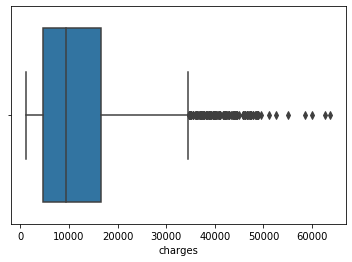

In [16]:
sns.boxplot(ins_df['charges'])

too many outlier present in charges columns at the side of the distribution 

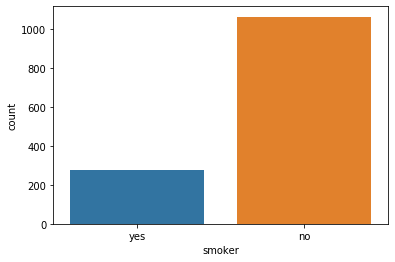

In [17]:
sns.countplot(x='smoker',data=ins_df)

count of smoker is less than no smokers

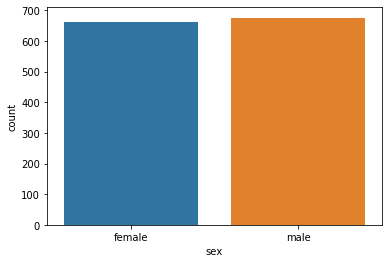

In [18]:
sns.countplot(x='sex',data=ins_df)

distribution of female and male are approx same.

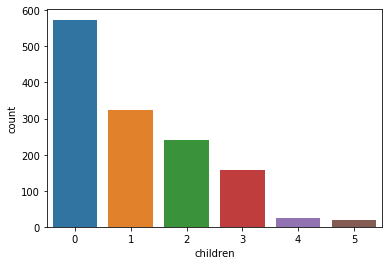

In [19]:
sns.countplot(x='children',data=ins_df)

gender having zero children frequency is more and gender having 4 and 5 children frequency are less

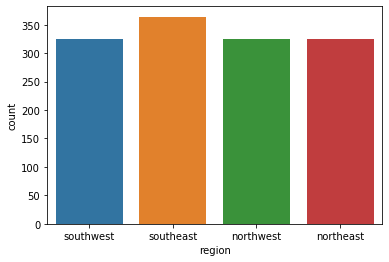

In [20]:
sns.countplot(x='region',data=ins_df)

frequency of region southeast is more than other region and all 3 regions are having same frequnecy. 

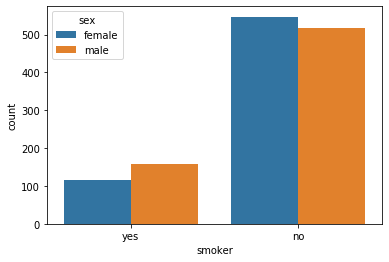

In [21]:
sns.countplot(x='smoker',hue='sex',data=ins_df)


males are more smoker than female 

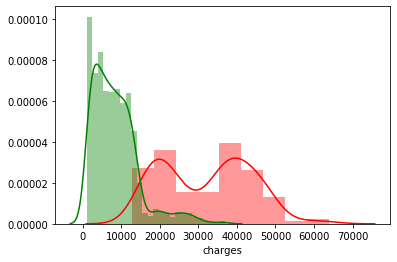

In [22]:
sns.distplot(ins_df[ins_df.smoker=='yes']['charges'], color ='r')
sns.distplot(ins_df[ins_df.smoker=='no']['charges'], color ='g')

charges of smokers are more and charges of non smoker are less 

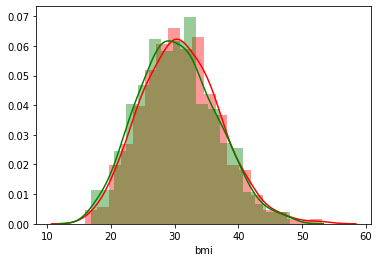

In [45]:
sns.distplot(ins_df[ins_df.sex=='male']['bmi'], color ='r')
sns.distplot(ins_df[ins_df.sex=='female']['bmi'], color ='g')

body mass index are approx same for both female and male 

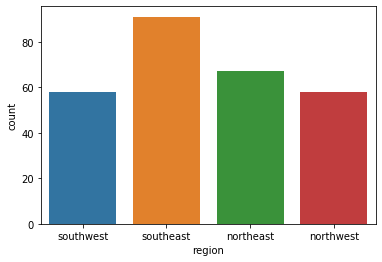

In [46]:
sns.countplot(ins_df[ins_df.smoker=='yes']['region'])

south east region having more smoker as compare to another region

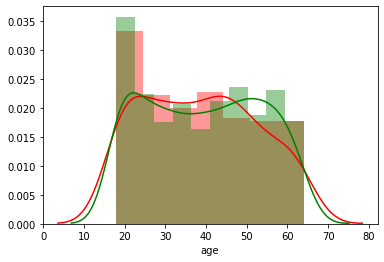

In [47]:
sns.distplot(ins_df[ins_df.smoker=='yes']['age'],color='r')
sns.distplot(ins_df[ins_df.smoker=='no']['age'],color='g')

In [50]:
smoker_age=ins_df[ins_df.smoker=='yes']['age'].value_counts()
smoker_age

19    18
18    12
43    12
47    10
20     9
27     9
30     9
37     9
42     8
23     7
64     7
36     6
51     6
61     6
22     6
24     6
29     6
44     6
33     6
39     6
52     6
53     5
60     5
25     5
31     5
32     5
34     5
35     5
46     5
40     5
63     5
45     5
48     5
54     5
57     4
62     4
50     4
49     4
59     4
56     4
26     3
28     3
38     2
21     2
55     2
41     2
58     1
Name: age, dtype: int64

In [52]:
smoker_no=ins_df[ins_df.smoker=='no']['age'].value_counts()
smoker_no

18    57
19    50
21    26
50    25
26    25
28    25
41    25
55    24
58    24
49    24
48    24
46    24
45    24
38    23
54    23
53    23
52    23
51    23
25    23
24    22
40    22
57    22
31    22
56    22
22    22
32    21
34    21
23    21
29    21
44    21
59    21
35    20
20    20
33    20
27    19
39    19
36    19
42    19
62    19
47    19
30    18
60    18
63    18
61    17
37    16
43    15
64    15
Name: age, dtype: int64

from the above graph and count output we can say that young people smoker more the old people(after 50)

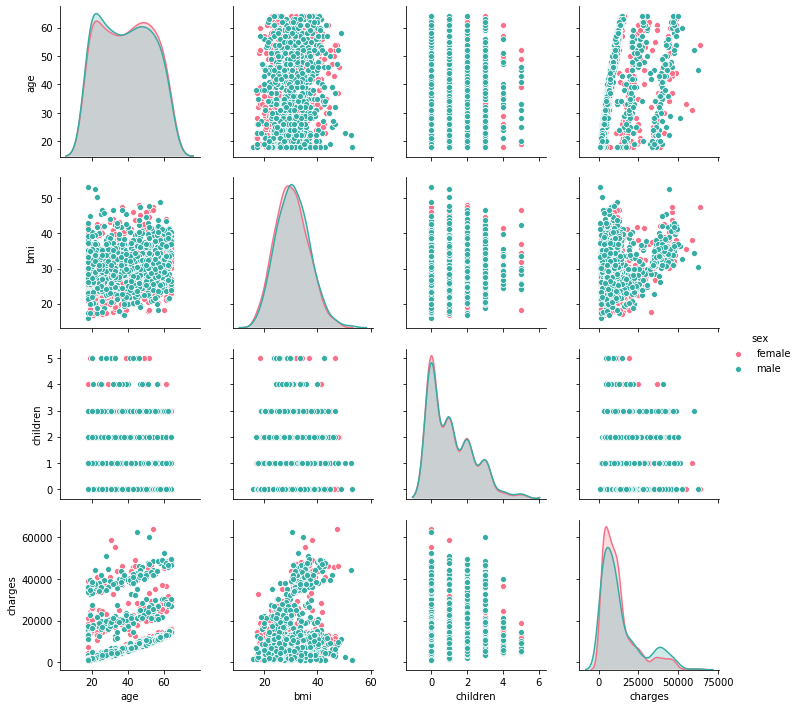

In [23]:
sns.pairplot(ins_df,hue='sex',palette='husl')

bmi of both male and female distribution are approx same and charges columns distribution having right skew distribution

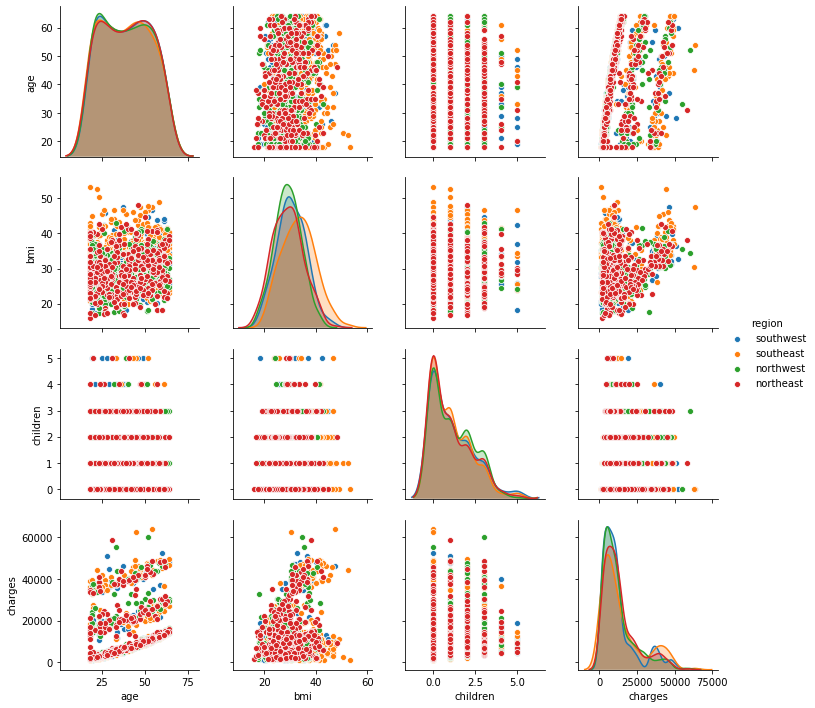

In [24]:
sns.pairplot(ins_df,hue='region')

bmi across different age is also same

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


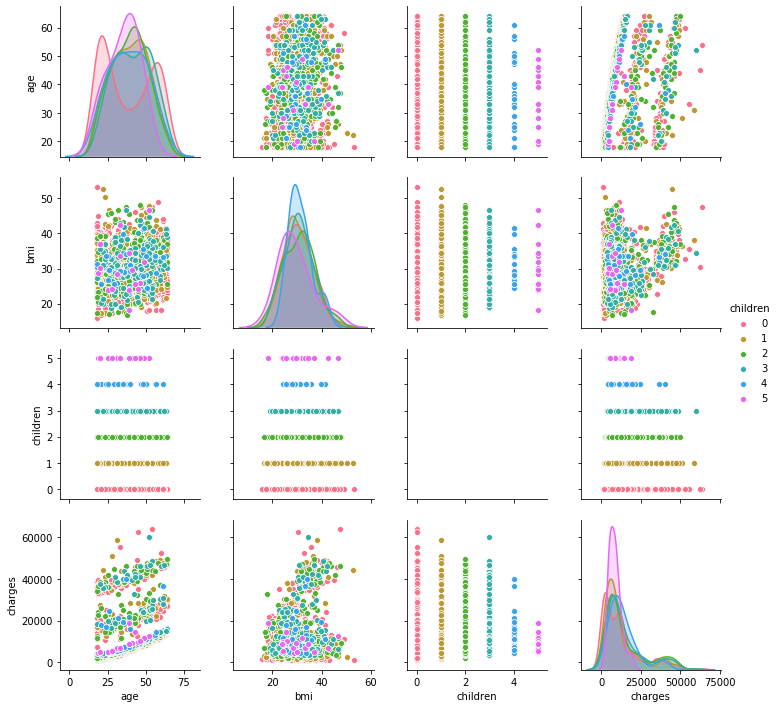

In [25]:
sns.pairplot(ins_df,hue='children',palette='husl')

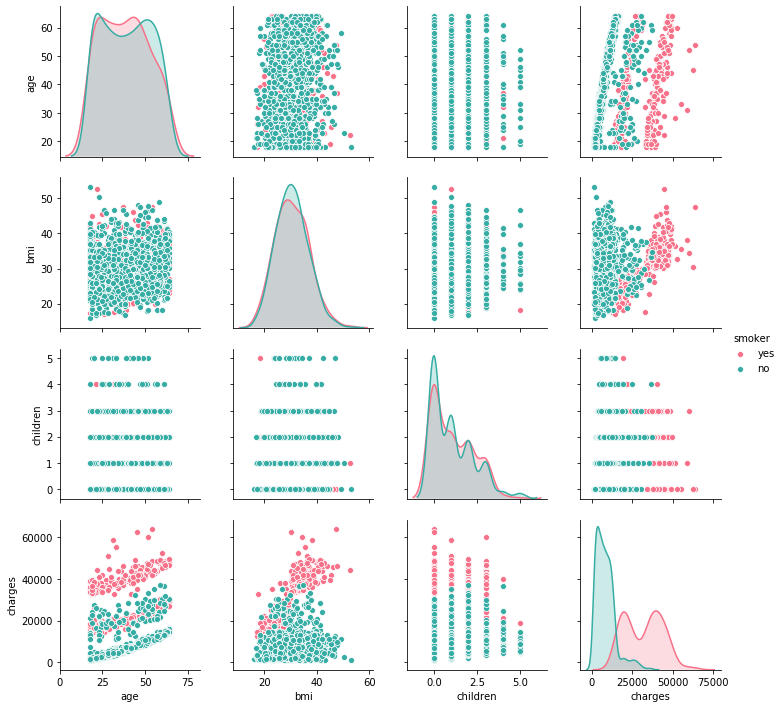

In [26]:
sns.pairplot(ins_df,hue='smoker',palette='husl')

#  first problem using two independent sample test

In [27]:
sample1=ins_df[ins_df.smoker=='yes']['charges']

In [28]:
sample2=ins_df[ins_df.smoker=='no']['charges']

In [29]:
from scipy.stats import ttest_ind

In [30]:
stat, pvalue = ttest_ind(sample1,sample2)

In [31]:
print("means of smokers charges=", sample1.mean() ,'|',"mean of non smokers charges=", sample2.mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('h0:charges of smoker is same as non  smoker (fail to reject H0)')
else:
	print('alternate:charges of smoker is not same as non smoker (reject H0) [ charges of smokers are more than non smoker ]')

means of smokers charges= 32050.23183153285 | mean of non smokers charges= 8434.268297856199
Tstatistic , Pvalue 46.664921172723716 8.271435842177219e-283
alternate:charges of smoker is not same as non smoker (reject H0) [ charges of smokers are more than non smoker ]


from the above obsevation we can say that charges of smokers are higher than of non smokers 

# second problem using two independent test

In [32]:
bmi_male=ins_df[ins_df.sex=='male']['bmi']


In [33]:
bmi_female=ins_df[ins_df.sex=='female']['bmi']


In [34]:
stat, pvalue = ttest_ind(bmi_male,bmi_female)

In [35]:
print(" of bmi_male=", bmi_male.mean() ,'|',"mean of bmi_female=", bmi_female.mean())
print("Tstameanstistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('h0:bmi of males are same as females  (fail to reject H0)')
else:
	print('alternate:bmi of males are not same as females  (reject H0)')

 of bmi_male= 30.943128698224832 | mean of bmi_female= 30.377749244713023
Tstameanstistic , Pvalue 1.696752635752224 0.08997637178984932
h0:bmi of males are same as females  (fail to reject H0)


from the above result we can say that bmi of males and females are same 

# question three solution using chisquare test

In [36]:
# h0: all proportions are same 
# ha: atleast one proportion are differ from one another
chisquare(ins_df["sex"].value_counts())

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)

p value>0.05 hence we conclude that all proportion are same 

In [37]:
chisquare(ins_df['smoker'].value_counts())

Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)

p value < 0.05 we conclude that proportions are not same in smokers

In [38]:
count = pd.crosstab(ins_df["sex"],
                   ins_df["smoker"])

In [39]:
count

smoker,no,yes
sex,,
female,547,115
male,517,159


In [40]:
chi2_contingency(count)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

p value < 0.05 therefore proportions are not same and both columns are independent 

# question 4 solution using one way aonva test

In [54]:
from scipy.stats import f_oneway 

In [75]:
_0_chd=ins_df.loc[ins_df['children']==0].iloc[:,0:4]
_1_chd=ins_df.loc[ins_df['children']==1].iloc[:,0:4]
_2_chd=ins_df.loc[ins_df['children']==2].iloc[:,0:4]
women_0_chd =_0_chd.loc[_0_chd['sex']=='female'].iloc[:,2]
women_1_chd =_1_chd.loc[_1_chd['sex']=='female'].iloc[:,2]
women_2_chd =_2_chd.loc[_2_chd['sex']=='female'].iloc[:,2]

In [79]:
tstatistic , pval= f_oneway(women_0_chd, women_1_chd, women_2_chd)
print(pval)

if pval < 0.05:
    print("reject h0 : there is significance difference in BMI  across women with 0, 1, 2 children")
else:
    print("accept h0 : there is no significance difference in BMI  across women with 0, 1, 2 children")

0.7158579926754841
accept h0 : there is no significance difference in BMI  across women with 0, 1, 2 children


from the above we can say that bmi across women 0 , 1 ,2 children are same 